In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
from sa_model_variation import SensitivityAnalysis

In [10]:
get_effective_points = SensitivityAnalysis.get_effective_pareto_points

I want to plot pareto points that are contained within variation_{idx}_sobol_pareto.csv. The Csv file looks like this: building pareto_index cost emission ASHP_35 ASHP_60 B162298 0 20669.34956 999.9181077 0 0 B162298 1 18554.23455 2751.923745 0 0 B162298 2 16226.21544 4154.51123 0 0 B162298 3 16226.21544 4154.51123 0 0 B162298 4 16226.21544 4154.51123 0 0 B162298 5 16127.68193 9759.946295 0 0 B162298 6 14743.43982 11511.95193 0 0 I want to have a function, where I specify a list of files that the function will read into, and it can create a emission-cost plot of all pareto fronts on the same plot with legends.



In [15]:
def plot_pareto_fronts(
    file_list: List[str], legend_list: list = None, save_path: str = None
):
    # assert (
    #     len(file_list) == len(legend_list),
    #     "The number of files and legends must be the same.",
    # )
    if not legend_list:
        legend_list = [os.path.basename(file) for file in file_list]
    plt.figure(figsize=(12, 8))
    for idx, file in enumerate(file_list):
        if get_effective_points(file, threshold=0.01) < 7:
            continue
        df = pd.read_csv(file)
        plt.plot(df["emission"], df["cost"], label=legend_list[idx], marker=".")

    plt.xlabel("Emission [kgCO2eq/kWhyr]")
    plt.ylabel("Cost [CHF/kWhyr]")
    # plt.legend()
    if save_path:
        plt.savefig(save_path)
    plt.show()

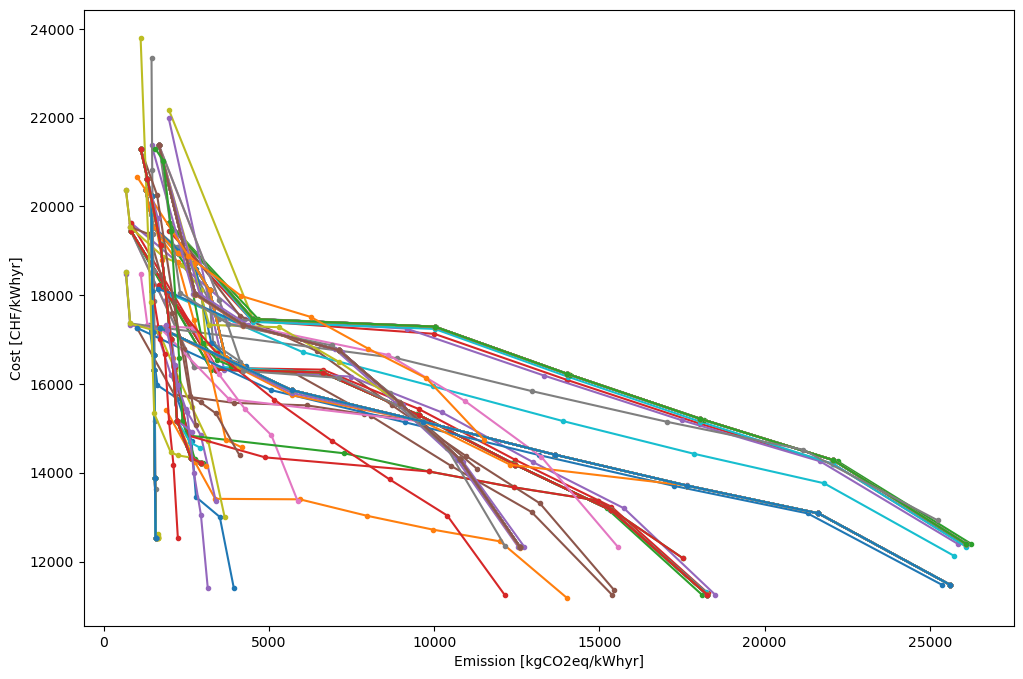

In [16]:
result_folder = r"D:\OneDrive\ETHY3FW\semesterProjectYiqiaoWang\CEA\Altstetten\basecase_residential\outputs\data\optimization\calliope_energy_hub\global_supply\result"
pareto_result_list = []
legend_list = []
# iterate though all the files in the result folder
for file in os.listdir(result_folder):
    if file.endswith("pareto.csv"):
        pareto_result_list.append(os.path.join(result_folder, file))
        legend_list.append(file.split("_")[1])

pareto_result_list.append(
    r"D:\OneDrive\ETHY3FW\semesterProjectYiqiaoWang\CEA\Altstetten\basecase_residential\outputs\data\optimization\calliope_energy_hub\B162298_pareto.csv"
)
legend_list.append("original")
plot_pareto_fronts(pareto_result_list, legend_list, save_path=None)